In [1]:
from platform import python_version

print(python_version())

3.8.3


In [1]:
# Nonlinear Simulation One

import torch
import numpy as np
import pandas as pd

data1_train_whole = pd.read_csv('X1Train.csv',header=None)
data2_train_whole = pd.read_csv('X2Train.csv',header=None)
Y_train_whole = pd.read_csv('YTrain.csv',header=None)
data1_valid_whole = pd.read_csv('X1Tune.csv',header=None)
data2_valid_whole = pd.read_csv('X2Tune.csv',header=None)
Y_valid_whole = pd.read_csv('YTune.csv',header=None)
data1_test_whole = pd.read_csv('X1Test.csv',header=None)
data2_test_whole = pd.read_csv('X2Test.csv',header=None)
Y_test_whole = pd.read_csv('YTest.csv',header=None)

# DeepIDA_nonBootstrap/Bootstrap/VS are all based on one single data
# The simulation results are based on 20 datasets
# Here we extract the first dataset to make an example
# n = 350, p1 = 500, p2 = 500
i = 0

train_index = np.r_[0+350*i:350+350*i]
valid_index = np.r_[0+350*i:350+350*i]
test_index = np.r_[0+350*i:350+350*i]
Y_train = torch.tensor(Y_train_whole.iloc[:,i].values).reshape(1,-1)[0]
Y_valid = torch.tensor(Y_valid_whole.iloc[:,i].values).reshape(1,-1)[0]
Y_test = torch.tensor(Y_test_whole.iloc[:,i].values).reshape(1,-1)[0]
data1_train = torch.tensor(data1_train_whole.iloc[train_index,].values).float()
data2_train = torch.tensor(data2_train_whole.iloc[train_index,].values).float()
data1_valid = torch.tensor(data1_valid_whole.iloc[valid_index,].values).float()
data2_valid = torch.tensor(data2_valid_whole.iloc[valid_index,].values).float()
data1_test = torch.tensor(data1_test_whole.iloc[test_index,].values).float()
data2_test = torch.tensor(data2_test_whole.iloc[test_index,].values).float()


data_train = [data1_train,data2_train]
data_valid = [data1_valid,data2_valid]
data_test = [data1_test,data2_test]




time for parallel sorting:  2716.1072566999997


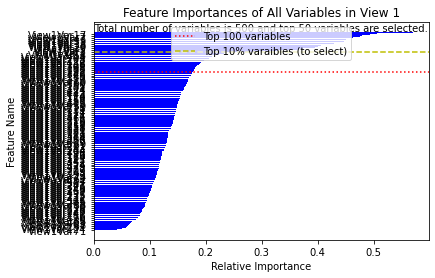

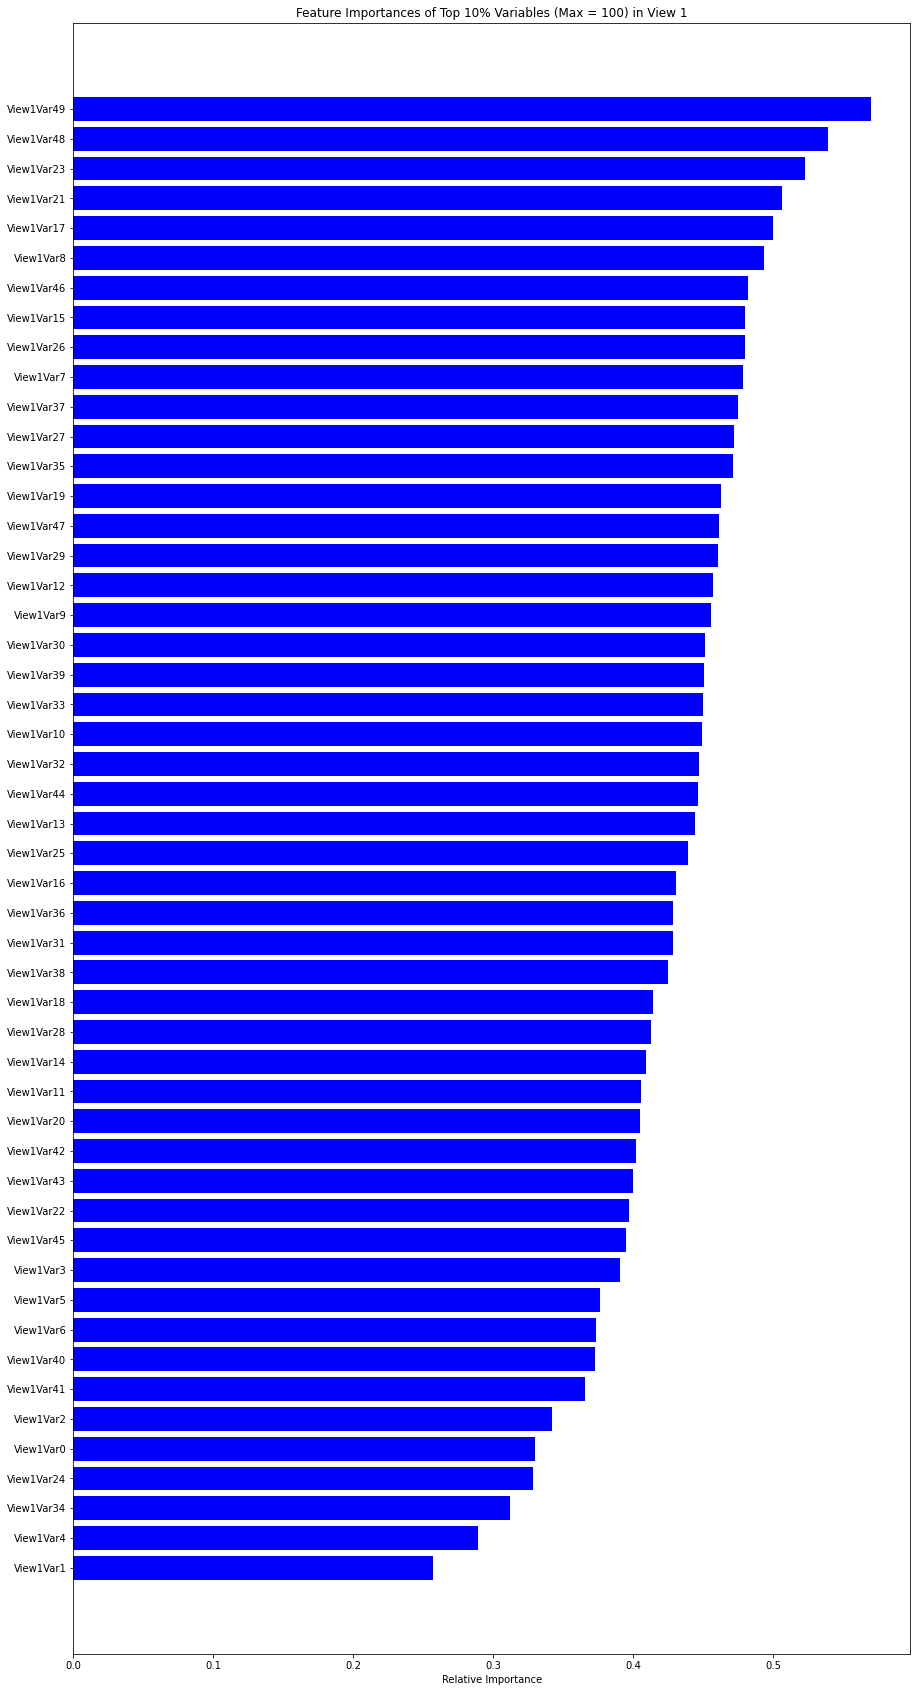

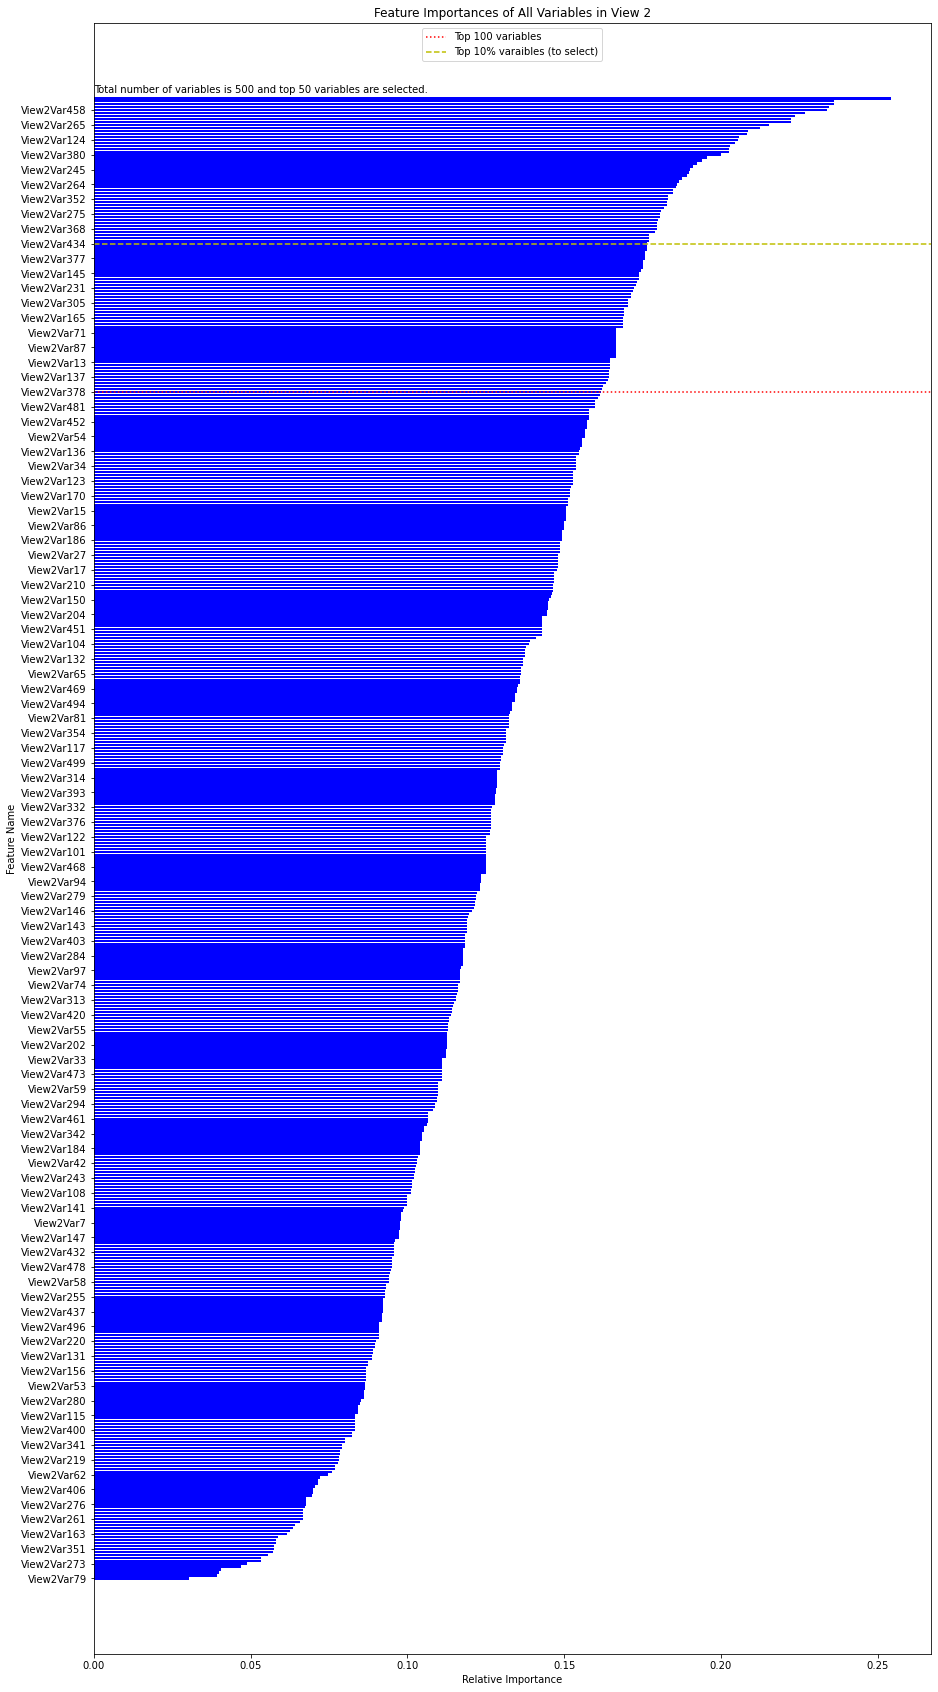

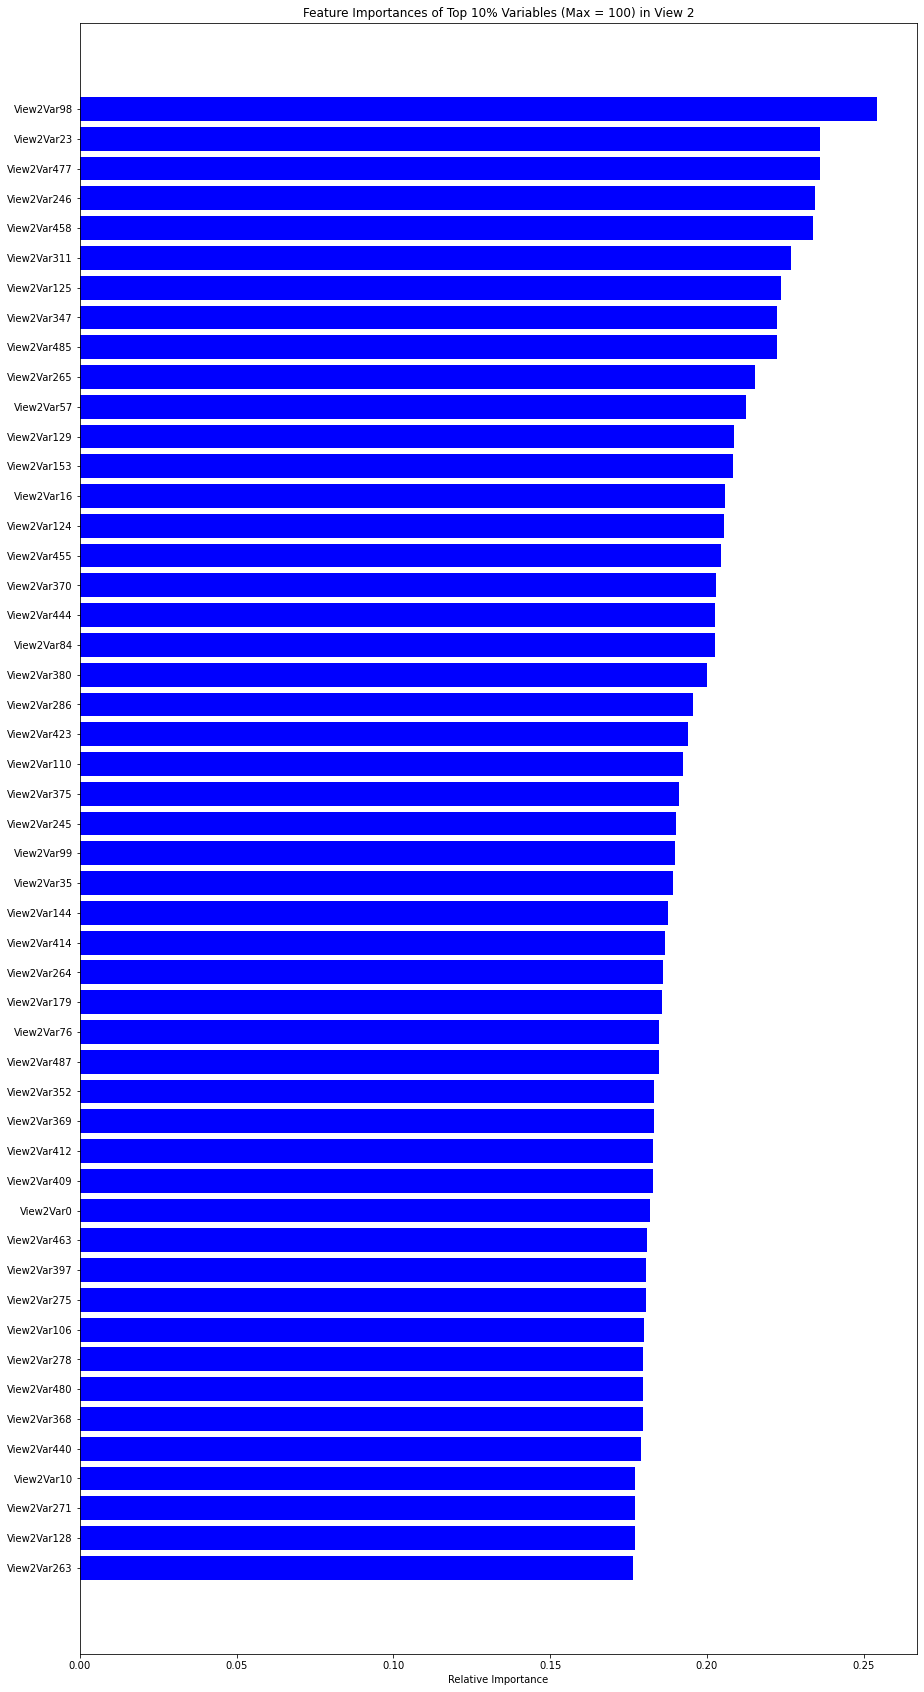

epoch: 0
train_loss: -0.1925782859325409
val_loss: -0.2454099804162979
epoch: 1
train_loss: -0.3469943404197693
val_loss: -0.2703469395637512
epoch: 2
train_loss: -0.5260953903198242
val_loss: -0.35425835847854614
epoch: 3
train_loss: -0.8873971700668335
val_loss: -0.3109549880027771
epoch: 4
train_loss: -1.073995590209961
val_loss: -0.32925355434417725
epoch: 5
train_loss: -1.1740336418151855
val_loss: -0.35731470584869385
epoch: 6
train_loss: -1.4989722967147827
val_loss: -0.3851659297943115
epoch: 7
train_loss: -1.657088041305542
val_loss: -0.33269816637039185
epoch: 8
train_loss: -1.8252568244934082
val_loss: -0.357589989900589
epoch: 9
train_loss: -1.8936591148376465
val_loss: -0.3379175066947937
epoch: 10
train_loss: -1.9416286945343018
val_loss: -0.33294594287872314
epoch: 11
train_loss: -1.9572818279266357
val_loss: -0.3201492428779602
epoch: 12
train_loss: -1.9720048904418945
val_loss: -0.35539084672927856
epoch: 13
train_loss: -1.978428602218628
val_loss: -0.37173524498939514

5/5 [==============================] - 0s 688us/step - loss: 1.3999 - loss_mse: 1.2524
Epoch 10/30
5/5 [==============================] - 0s 598us/step - loss: 1.4272 - loss_mse: 1.2468
Epoch 11/30
5/5 [==============================] - 0s 595us/step - loss: 1.3483 - loss_mse: 1.2416
Epoch 12/30
5/5 [==============================] - 0s 595us/step - loss: 1.4147 - loss_mse: 1.2356
Epoch 13/30
5/5 [==============================] - 0s 596us/step - loss: 1.3985 - loss_mse: 1.2303
Epoch 14/30
5/5 [==============================] - 0s 598us/step - loss: 1.3389 - loss_mse: 1.2240
Epoch 15/30
5/5 [==============================] - 0s 596us/step - loss: 1.3846 - loss_mse: 1.2186
Epoch 16/30
5/5 [==============================] - 0s 599us/step - loss: 1.3721 - loss_mse: 1.2135
Epoch 17/30
5/5 [==============================] - 0s 399us/step - loss: 1.3724 - loss_mse: 1.2077
Epoch 18/30
5/5 [==============================] - 0s 398us/step - loss: 1.3253 - loss_mse: 1.2022
Epoch 19/30
5/5 [=====

In [2]:
# The output of DeepIDA_Bootstrap contains that of DeepIDA_VS,i.e. features selected
# To access the feature selection accuracy, extract that and compare with the truth
# DeepIDA_nonBootstrap/Bootstrap/VS are all based on one single data
# The simulation results are based on 20 datasets 

variables_name_list = [pd.Index(['View1Var%d' % i for i in range(500)]),pd.Index(['View2Var%d' % i for i in range(500)])]
structure = [[256,256,256,256,256,256,256,256,256,256,64,20],
             [256,256,256,256,256,256,256,256,256,256,64,20]]
n_boot = 100

from main_functions import DeepIDA_Bootstrap
result = DeepIDA_Bootstrap(data_train, data_valid, data_test, Y_train, Y_valid, Y_test,structure,n_boot, 20,variables_name_list, [50,50],  0.01, 30 )

In [11]:
# Variable selection results
# All feature importance are generated in both pdf figures and csv tables
for i in range(len(data_train)):
    print("Top 10% selected variables for view"+str(i+1)+":")
    print(result[0][0][i].values)
    print("Number of selected variables: "+str(result[0][1][i]))

Top 10% selected variables for view1:
[33 28  3 23 44 10 11 12 13 24 38 26 15  2 32  5 34 22 20  9 16 19 37 45
 21  8 17 30 42 41 46 31 36 43 49 35 14 48 27 29  4 39 47 25  7  0 18  6
 40]
Number of selected variables: 50
Top 10% selected variables for view2:
[ 98 265 487 423  16 370 179 352 369 275 397 153 347  23 124 444 311 414
 125 458   0 368 110  84 271 128  99  10  57 144 380 246 412 264 455 278
 477 480 375 485 129 286  76 409 463 440 245 106  35]
Number of selected variables: 50


In [17]:
# Based on selected variables
# Training/Test classification rate for DeepIDA based on selected variables
print("Training classification accuracy DeepIDA on all views: "+str(result[1][0]))
print("Test classification accuracy DeepIDA on all views: "+str(result[1][1]))
for i in range(len(data_train)):
    print("Training classification accuracy DeepIDA on view"+str(i+1)+":")
    print(result[1][4][i])
    print("Test classification accuracy DeepIDA on view"+str(i+1)+":")
    print(result[1][5][i])


Training classification accuracy DeepIDA on all views: 1.0
Test classification accuracy DeepIDA on all views: 0.5714285714285714
Training classification accuracy DeepIDA on view1:
0.9485714285714286
Test classification accuracy DeepIDA on view1:
0.9428571428571428
Training classification accuracy DeepIDA on view2:
1.0
Test classification accuracy DeepIDA on view2:
0.5142857142857142


In [18]:
# NonBootstrap version
from main_functions import DeepIDA_nonBootstrap
result_nonBoot = DeepIDA_nonBootstrap(data_train, data_valid, data_test, Y_train, Y_valid, Y_test,structure,[50,50],  0.01, 30 )

epoch: 0
train_loss: -0.21350735425949097
val_loss: -0.21274186670780182
epoch: 1
train_loss: -0.1745855212211609
val_loss: -0.3105250298976898
epoch: 2
train_loss: -0.2818981409072876
val_loss: -0.29784783720970154
epoch: 3
train_loss: -0.4283853769302368
val_loss: -0.30255624651908875
epoch: 4
train_loss: -0.8723584413528442
val_loss: -0.29032766819000244
epoch: 5
train_loss: -1.1515382528305054
val_loss: -0.2826223373413086
epoch: 6
train_loss: -1.4065539836883545
val_loss: -0.27480608224868774
epoch: 7
train_loss: -1.6037228107452393
val_loss: -0.3405224680900574
epoch: 8
train_loss: -1.7370755672454834
val_loss: -0.3554961681365967
epoch: 9
train_loss: -1.8062719106674194
val_loss: -0.34277743101119995
epoch: 10
train_loss: -1.876427173614502
val_loss: -0.33701491355895996
epoch: 11
train_loss: -1.9260637760162354
val_loss: -0.42031270265579224
epoch: 12
train_loss: -1.9530630111694336
val_loss: -0.37089261412620544
epoch: 13
train_loss: -1.9687702655792236
val_loss: -0.4273035526

5/5 [==============================] - 0s 598us/step - loss: 2.3710 - loss_mse: 1.3210
Epoch 10/30
5/5 [==============================] - 0s 798us/step - loss: 1.5795 - loss_mse: 1.3090
Epoch 11/30
5/5 [==============================] - 0s 598us/step - loss: 2.2333 - loss_mse: 1.2985
Epoch 12/30
5/5 [==============================] - 0s 598us/step - loss: 2.1206 - loss_mse: 1.2915
Epoch 13/30
5/5 [==============================] - 0s 798us/step - loss: 2.3568 - loss_mse: 1.2820
Epoch 14/30
5/5 [==============================] - 0s 598us/step - loss: 2.2969 - loss_mse: 1.2741
Epoch 15/30
5/5 [==============================] - 0s 798us/step - loss: 1.5579 - loss_mse: 1.2633
Epoch 16/30
5/5 [==============================] - 0s 598us/step - loss: 1.7330 - loss_mse: 1.2550
Epoch 17/30
5/5 [==============================] - 0s 598us/step - loss: 2.3016 - loss_mse: 1.2476
Epoch 18/30
5/5 [==============================] - 0s 599us/step - loss: 2.2767 - loss_mse: 1.2381
Epoch 19/30
5/5 [=====

In [19]:
# Based on all variables
# Training/Test classification rate for DeepIDA based on all variables
print("Training classification accuracy DeepIDA on all views: "+str(result_nonBoot[0]))
print("Test classification accuracy DeepIDA on all views: "+str(result_nonBoot[1]))
for i in range(len(data_train)):
    print("Training classification accuracy DeepIDA on view"+str(i+1)+":")
    print(result_nonBoot[4][i])
    print("Test classification accuracy DeepIDA on view"+str(i+1)+":")
    print(result_nonBoot[5][i])


Training classification accuracy DeepIDA on all views: 0.9971428571428571
Test classification accuracy DeepIDA on all views: 0.58
Training classification accuracy DeepIDA on view1:
1.0
Test classification accuracy DeepIDA on view1:
0.9771428571428571
Training classification accuracy DeepIDA on view2:
0.9971428571428571
Test classification accuracy DeepIDA on view2:
0.4342857142857143


In [20]:
# MNIST dataset

import torch
import torch.nn as nn
import numpy as np
from utils import load_data
import time
import logging
try:
    import cPickle as thepickle
except ImportError:
    import _pickle as thepickle
import gzip
torch.set_default_tensor_type(torch.DoubleTensor)


In [21]:
data1 = load_data('./noisymnist_view1.gz')
data2 = load_data('./noisymnist_view2.gz')

data1_train, data2_train = data1[0][0], data2[0][0]
data1_valid, data2_valid = data1[1][0], data2[1][0]
data1_test, data2_test = data1[2][0], data2[2][0]

loading data ...
loading data ...


In [25]:
Y_train =torch.tensor(data1[0][1])
Y_valid =torch.tensor(data1[1][1])
Y_test =torch.tensor(data1[2][1])
data_train = [data1_train,data2_train]
data_valid = [data1_valid,data2_valid]
data_test = [data1_test,data2_test]

In [27]:
# NonBootstrap version
from main_functions import DeepIDA_nonBootstrap
result_MNIST = DeepIDA_nonBootstrap(data_train, data_valid, data_test, Y_train, Y_valid, Y_test,
                                    structure=[[512,256,64,20],[512,256,64,20]], TS_num_features=[20,20], lr_rate = 0.001, n_epoch = 50 )

epoch: 0
train_loss: -0.8289725719829331
val_loss: -1.2813208804579133
epoch: 1
train_loss: -3.961788970153294
val_loss: -3.5457843921543226
epoch: 2
train_loss: -5.771485286555038
val_loss: -4.907440512810737
epoch: 3
train_loss: -7.0981254904832305
val_loss: -5.8522373874452995
epoch: 4
train_loss: -8.132417055748544
val_loss: -6.580719837535771
epoch: 5
train_loss: -8.950744142850187
val_loss: -7.235936972458533
epoch: 6
train_loss: -9.604931685350941
val_loss: -7.827838557294501
epoch: 7
train_loss: -10.13562178322043
val_loss: -8.341904881705295
epoch: 8
train_loss: -10.580421706229835
val_loss: -8.780325388231573
epoch: 9
train_loss: -10.95708087646716
val_loss: -9.150944054433529
epoch: 10
train_loss: -11.277544992680212
val_loss: -9.462403292035777
epoch: 11
train_loss: -11.55716865411967
val_loss: -9.738311435825615
epoch: 12
train_loss: -11.802589882501053
val_loss: -9.976263119725644
epoch: 13
train_loss: -12.021006224200093
val_loss: -10.177003242665748
epoch: 14
train_loss

5/5 [==============================] - 0s 18ms/step - loss: 2.9424 - loss_mse: 0.6323
Epoch 10/30
5/5 [==============================] - 0s 17ms/step - loss: 3.2944 - loss_mse: 0.6199
Epoch 11/30
5/5 [==============================] - 0s 16ms/step - loss: 3.2979 - loss_mse: 0.6109
Epoch 12/30
5/5 [==============================] - 0s 16ms/step - loss: 2.4498 - loss_mse: 0.6052
Epoch 13/30
5/5 [==============================] - 0s 16ms/step - loss: 3.3286 - loss_mse: 0.5947
Epoch 14/30
5/5 [==============================] - 0s 16ms/step - loss: 3.0917 - loss_mse: 0.5885
Epoch 15/30
5/5 [==============================] - 0s 16ms/step - loss: 2.9734 - loss_mse: 0.5806
Epoch 16/30
5/5 [==============================] - 0s 16ms/step - loss: 3.2655 - loss_mse: 0.5725
Epoch 17/30
5/5 [==============================] - 0s 17ms/step - loss: 2.4094 - loss_mse: 0.5655
Epoch 18/30
5/5 [==============================] - 0s 16ms/step - loss: 3.3626 - loss_mse: 0.5582
Epoch 19/30
5/5 [===============

In [28]:
# Based on all variables
# Training/Test classification rate for DeepIDA based on all variables
print("Training classification accuracy DeepIDA on all views: "+str(result_MNIST[0]))
print("Test classification accuracy DeepIDA on all views: "+str(result_MNIST[1]))
for i in range(len(data_train)):
    print("Training classification accuracy DeepIDA on view"+str(i+1)+":")
    print(result_MNIST[4][i])
    print("Test classification accuracy DeepIDA on view"+str(i+1)+":")
    print(result_MNIST[5][i])


Training classification accuracy DeepIDA on all views: 0.98888
Test classification accuracy DeepIDA on all views: 0.9705
Training classification accuracy DeepIDA on view1:
0.96468
Test classification accuracy DeepIDA on view1:
0.9345
Training classification accuracy DeepIDA on view2:
0.946
Test classification accuracy DeepIDA on view2:
0.8782
